In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fulldata = pd.read_csv('../cleaned_data.csv')
fulldata.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi,roi_category,movie_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000,high,The Gallows (2015),tt2309260,The Gallows,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller"
1,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,10175.949000,high,The Devil Inside (2012),tt1560985,The Devil Inside,The Devil Inside,2012.0,83.0,Horror
2,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,5917.067733,high,Paranormal Activity 2 (2010),tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010.0,91.0,Horror
3,49,"Feb 24, 2017",Get Out,5000000,176040665,255367951,5107.359020,high,Get Out (2017),tt5052448,Get Out,Get Out,2017.0,104.0,"Horror,Mystery,Thriller"
4,64,"Oct 21, 2016",Moonlight,1500000,27854931,65245512,4349.700800,high,Moonlight (2016),tt4975722,Moonlight,Moonlight,2016.0,111.0,Drama


In [4]:
piv0 = pd.pivot_table(fulldata, index='genres', values='id', aggfunc='count')
piv0 = piv0.sort_values(by='id', ascending=False).reset_index()
piv0.index.name = 'genre_rank'
piv0 = piv0.reset_index()
piv0.head()

,genre_rank,genres,id
0,0,"Adventure,Animation,Comedy",67
1,1,Drama,63
2,2,Comedy,55
3,3,"Action,Adventure,Sci-Fi",52
4,4,"Comedy,Drama,Romance",52


In [5]:
MergedData = fulldata.merge(piv0, how='left', on='genres')
MergedData

,id_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_roi,roi_category,movie_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_rank,id_y
0,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41656.474000,high,The Gallows (2015),tt2309260,The Gallows,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller",9,31
1,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,10175.949000,high,The Devil Inside (2012),tt1560985,The Devil Inside,The Devil Inside,2012.0,83.0,Horror,22,18
2,65,"Oct 20, 2010",Paranormal Activity 2,3000000,84752907,177512032,5917.067733,high,Paranormal Activity 2 (2010),tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010.0,91.0,Horror,22,18
3,49,"Feb 24, 2017",Get Out,5000000,176040665,255367951,5107.359020,high,Get Out (2017),tt5052448,Get Out,Get Out,2017.0,104.0,"Horror,Mystery,Thriller",9,31
4,64,"Oct 21, 2016",Moonlight,1500000,27854931,65245512,4349.700800,high,Moonlight (2016),tt4975722,Moonlight,Moonlight,2016.0,111.0,Drama,1,63
5,18,"May 25, 2012",Chernobyl Diaries,1000000,18119640,42411721,4241.172100,high,Chernobyl Diaries (2012),tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012.0,86.0,"Horror,Mystery,Thriller",9,31
6,51,"Oct 21, 2011",Paranormal Activity 3,5000000,104028807,207039844,4140.796880,high,Paranormal Activity 3 (2011),tt1778304,Paranormal Activity 3,Paranormal Activity 3,2011.0,83.0,"Horror,Mystery,Thriller",9,31
7,84,"Oct 3, 2014",Annabelle,6500000,84273813,256862920,3951.737231,high,Annabelle (2014),tt3322940,Annabelle,Annabelle,2014.0,99.0,"Horror,Mystery,Thriller",9,31
8,15,"Aug 27, 2010",The Last Exorcism,1800000,41034350,70165900,3898.105556,high,The Last Exorcism (2010),tt1320244,The Last Exorcism,The Last Exorcism,2010.0,87.0,"Drama,Horror,Thriller",41,9
9,56,"Dec 21, 2016",Dangal,9500000,12391761,294654618,3101.627558,high,Dangal (2016),tt5074352,Dangal,Dangal,2016.0,161.0,"Action,Biography,Drama",49,7


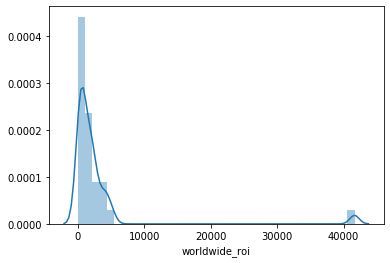

In [6]:
viz1 = MergedData.loc[MergedData['genres'] == 'Horror,Mystery,Thriller']
sns.distplot(viz1['worldwide_roi']);

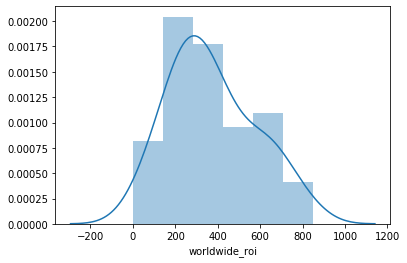

In [7]:
viz1 = MergedData.loc[MergedData['genres'] == 'Action,Adventure,Sci-Fi']
sns.distplot(viz1['worldwide_roi']);

# Specific Genres

In [10]:
fulldata = pd.read_csv('../movie_data2.csv')

In [35]:
sns.set_context('talk')

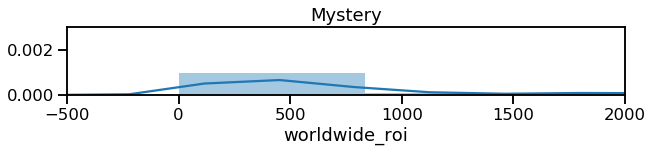

In [47]:
viz1 = fulldata.loc[fulldata['Mystery'] == 1]
plt.figure(figsize=(10,1.25))
viz = sns.distplot(viz1['worldwide_roi']);
viz.set(title='Mystery');
viz.set(ylim=(0,.003));
viz.set(xlim=(-500,2000));

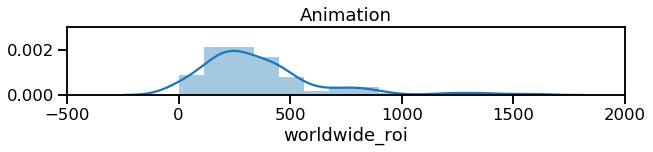

In [49]:
viz1 = fulldata.loc[fulldata['Animation'] == 1]
plt.figure(figsize=(10,1.25))
viz = sns.distplot(viz1['worldwide_roi']);
viz.set(title='Animation');
viz.set(ylim=(0,.003));
viz.set(xlim=(-500,2000));

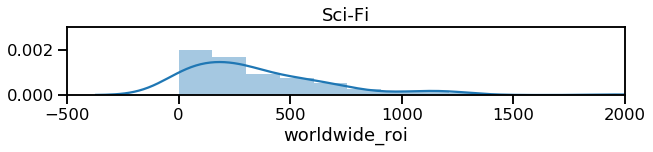

In [48]:
viz3 = fulldata.loc[fulldata['Sci-Fi'] == 1]
plt.figure(figsize=(10,1.25))
viz = sns.distplot(viz3['worldwide_roi']);
viz.set(title='Sci-Fi');
viz.set(ylim=(0,.003));
viz.set(xlim=(-500,2000));

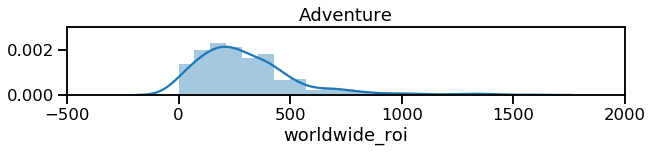

In [50]:
viz3 = fulldata.loc[fulldata['Adventure'] == 1]
plt.figure(figsize=(10,1.25))
viz = sns.distplot(viz3['worldwide_roi']);
viz.set(title='Adventure');
viz.set(ylim=(0,.003));
viz.set(xlim=(-500,2000));

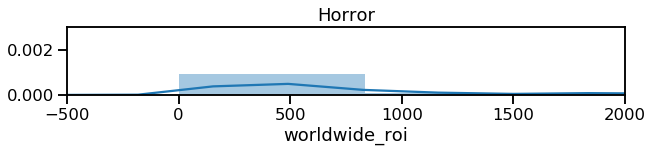

In [51]:
viz3 = fulldata.loc[fulldata['Horror'] == 1]
plt.figure(figsize=(10,1.25))
viz = sns.distplot(viz3['worldwide_roi']);
viz.set(title='Horror');
viz.set(ylim=(0,.003));
viz.set(xlim=(-500,2000));